Step 1: Import COVID-19 Dataset from Kaggle using API

In [1]:
# Install kaggle package if not already installed
!pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("abdoomoh/daily-covid-19-data-2020-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chand\.cache\kagglehub\datasets\abdoomoh\daily-covid-19-data-2020-2024\versions\2


In [8]:
# Set the dataset path
dataset_path = r"C:\Users\chand\.cache\kagglehub\datasets\abdoomoh\daily-covid-19-data-2020-2024\versions\2"



Step 2: Load Dataset & Initial Exploration

In [15]:
import pandas as pd
import os

# set the base dataset path
base_path = r"C:\Users\chand\.cache\kagglehub\datasets\abdoomoh\daily-covid-19-data-2020-2024\versions"
version_folder = os.listdir(base_path)[0] # use the first available version
full_folder_path = os.path.join(base_path, version_folder)

# combine path to the file
file_path = os.path.join(full_folder_path, "WHO-COVID-19-global-data.csv")

# now read the file
df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
print(df.head())

  Date_reported Country_code      Country WHO_region  New_cases  \
0    05/01/2020           AF  Afghanistan       EMRO        NaN   
1    12/01/2020           AF  Afghanistan       EMRO        NaN   
2    19/01/2020           AF  Afghanistan       EMRO        NaN   
3    26/01/2020           AF  Afghanistan       EMRO        NaN   
4    02/02/2020           AF  Afghanistan       EMRO        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


In [16]:
# check column data types
df.dtypes

Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object

Step 3: Data cleansing 

In [17]:
# Convert date safely
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')

# Check if any rows failed to convert
print("Rows with invalid dates:", df['Date_reported'].isnull().sum())

# Optional: Drop rows where date is NaT
df = df.dropna(subset=['Date_reported'])

# Confirm all dates are valid
print("Final check:", df['Date_reported'].isnull().sum())


Rows with invalid dates: 34800
Final check: 0


In [18]:
# Display rows where date conversion failed
bad_dates = df[df['Date_reported'].isnull()]
print(bad_dates)


Empty DataFrame
Columns: [Date_reported, Country_code, Country, WHO_region, New_cases, Cumulative_cases, New_deaths, Cumulative_deaths]
Index: []


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      23040 non-null  datetime64[ns]
 1   Country_code       22944 non-null  object        
 2   Country            23040 non-null  object        
 3   WHO_region         21312 non-null  object        
 4   New_cases          15230 non-null  float64       
 5   Cumulative_cases   23040 non-null  int64         
 6   New_deaths         9744 non-null   float64       
 7   Cumulative_deaths  23040 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [20]:
# check for missing or null values
df.isnull().sum()

Date_reported            0
Country_code            96
Country                  0
WHO_region            1728
New_cases             7810
Cumulative_cases         0
New_deaths           13296
Cumulative_deaths        0
dtype: int64

In [21]:
# fill the missing values with 0
df['Country_code'] = df['Country_code'].fillna(0)
df['WHO_region'] = df['WHO_region'].fillna(df['WHO_region'].mode()[0])
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)

In [22]:
# recheck
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23040 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      23040 non-null  datetime64[ns]
 1   Country_code       23040 non-null  object        
 2   Country            23040 non-null  object        
 3   WHO_region         23040 non-null  object        
 4   New_cases          23040 non-null  float64       
 5   Cumulative_cases   23040 non-null  int64         
 6   New_deaths         23040 non-null  float64       
 7   Cumulative_deaths  23040 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [24]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [25]:
df[df['New_cases']<0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4938,2022-10-04,BZ,Belize,AMRO,-2.0,57287,8.0,664
20739,2020-05-04,GT,Guatemala,AMRO,-27.0,50,0.0,1
31478,2022-06-11,MW,Malawi,AFRO,-88.0,88009,2.0,2685
33179,2023-12-02,MR,Mauritania,AFRO,-124.0,63438,0.0,997
34211,2024-02-06,FM,Micronesia (Federated States of),WPRO,-87.0,26460,0.0,65
39944,2023-11-06,PW,Palau,WPRO,-2.0,6009,0.0,9
45727,2023-04-06,WS,Samoa,WPRO,-20.0,16743,0.0,31
47740,2020-07-06,SX,Sint Maarten (Dutch part),AMRO,-1.0,77,0.0,15
55470,2020-11-10,VI,United States Virgin Islands,AMRO,-2.0,1324,0.0,20


In [26]:
df[df['New_deaths']<0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
10050,2023-02-04,CL,Chile,AMRO,14253.0,5264330,-3432.0,61050
20287,2020-01-11,GP,Guadeloupe,EURO,268.0,7742,-1.0,126
23591,2024-11-02,ID,Indonesia,SEARO,58.0,6828326,-4.0,162050
40180,2023-07-05,PA,Panama,AMRO,591.0,1037324,-1.0,8620
47363,2022-12-06,SL,Sierra Leone,AFRO,0.0,7682,-1.0,125


In [27]:
# replaces negative values with 0
df['New_cases'] = df['New_cases'].apply(lambda x: 0 if x < 0 else x)
df['New_deaths'] = df['New_deaths'].apply(lambda x: 0 if x < 0 else x)

In [30]:
# recheck
df[df['New_cases']<0]
df[df['New_deaths']<0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


In [31]:
# extract year from date_reported for analysis
df['Year'] = df['Date_reported'].dt.year

In [32]:
# Get list of all column names
cols = df.columns.tolist()

# Find index of 'Date_reported'
date_index = cols.index('Date_reported')

# Remove 'Year' if it already exists in the list
cols.remove('Year')

# Insert 'Year' right after 'Date_reported'
cols.insert(date_index + 1, 'Year')

# Reorder the DataFrame
df = df[cols]

In [33]:
# recheck everything
df.head()

,Date_reported,Year,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-05-01,2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
1,2020-12-01,2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
4,2020-02-02,2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
5,2020-09-02,2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
8,2020-01-03,2020,AF,Afghanistan,EMRO,1.0,1,0.0,0


# EDA (Exploratory Data Analysis)

In [34]:
# Get high-level summary statistics for numeric columns
df.describe()

,Date_reported,Year,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,23040,23040.000000,2.304000e+04,2.304000e+04,23040.000000,2.304000e+04
mean,2022-05-04 22:30:00.000000256,2021.854167,1.248205e+04,1.796626e+06,116.663889,1.990933e+04
min,2020-01-03 00:00:00,2020.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2021-03-07 18:00:00,2021.000000,0.000000e+00,3.550000e+03,0.000000,2.100000e+01
50%,2022-04-24 00:00:00,2022.000000,3.900000e+01,4.411400e+04,0.000000,4.680000e+02
75%,2023-06-14 18:00:00,2023.000000,1.089000e+03,5.160230e+05,10.000000,6.881000e+03
max,2024-12-05 00:00:00,2024.000000,2.464488e+07,1.034368e+08,47687.000000,1.194158e+06
std,NaN,1.353875,1.883607e+05,7.832438e+06,819.278309,8.188153e+04


Most Affected Countries

In [35]:
# Top 10 countries with highest total (cumulative) cases
top_countries = df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)
top_countries

Country
United States of America                                103436829
China                                                    99375079
India                                                    45042054
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37511921
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26781078
United Kingdom of Great Britain and Northern Ireland     24976777
Name: Cumulative_cases, dtype: int64

Cases by Year

In [36]:
# Total new cases reported per year
cases_by_year = df.groupby('Year')['New_cases'].sum()
cases_by_year

Year
2020     27530604.0
2021     78733874.0
2022    131629920.0
2023     48854857.0
2024       837180.0
Name: New_cases, dtype: float64

Deaths by WHO Region

In [37]:
# Total deaths by WHO Region
deaths_by_region = df.groupby('WHO_region')['Cumulative_deaths'].max().sort_values(ascending=False)
deaths_by_region


WHO_region
AMRO     1194158
SEARO     533626
EURO      403202
EMRO      146837
WPRO      122309
AFRO      102595
OTHER         13
Name: Cumulative_deaths, dtype: int64

Time Series Aggregation

In [38]:
# Global daily new cases trend
daily_cases = df.groupby('Date_reported')['New_cases'].sum()

# Show first 10 for quick check
daily_cases.head(10)


Date_reported
2020-01-03       8273.0
2020-01-11    3526641.0
2020-02-02      12538.0
2020-02-08    1839236.0
2020-03-05     545638.0
2020-04-10    2133124.0
2020-05-01          2.0
2020-05-04     466289.0
2020-05-07    1328647.0
2020-06-09    1985046.0
Name: New_cases, dtype: float64

# Data Visualization

Visualization 1: Global Daily New Cases (Line Plot)

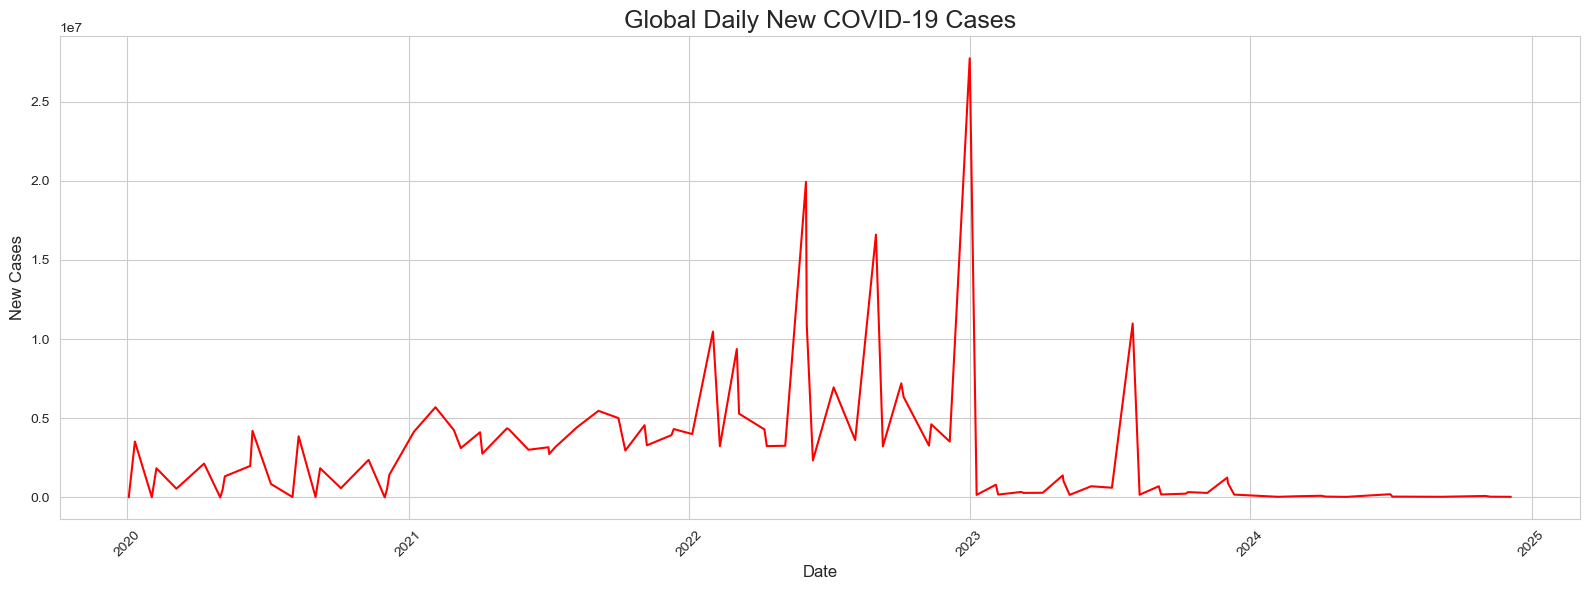

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")

# Plotting daily new cases
plt.plot(daily_cases.index, daily_cases.values, color='red', linewidth=1.5)

# Title & Labels
plt.title('Global Daily New COVID-19 Cases', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)

# Rotate x-axis for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

plt.tight_layout()
plt.show()


Visualization 2: Top 10 Most Affected Countries (Bar Chart)

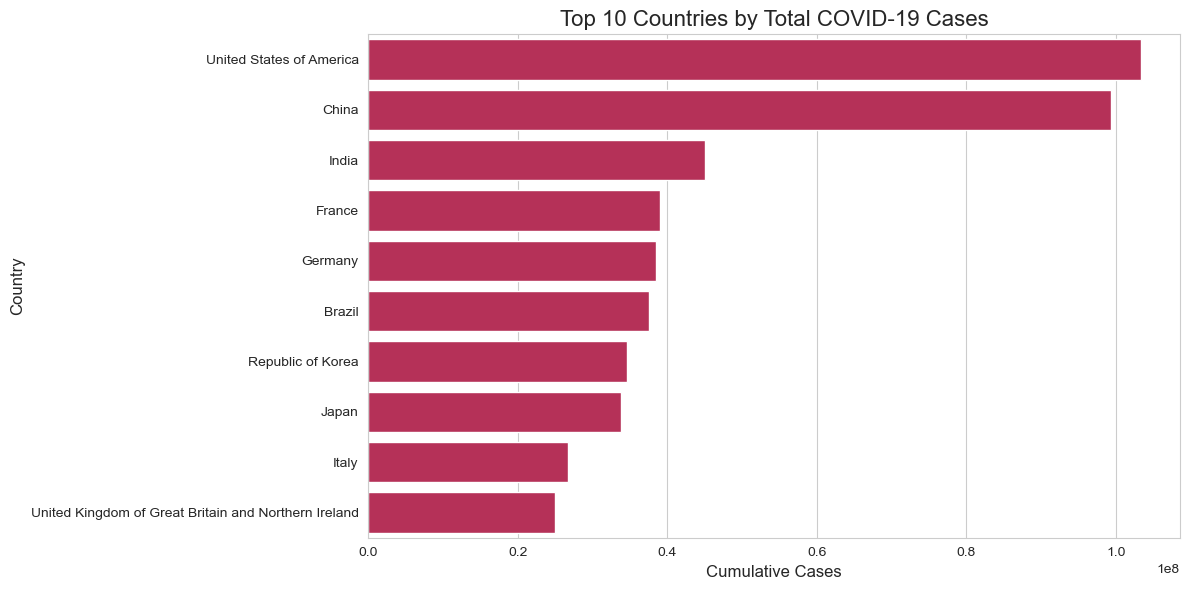

In [40]:
# Convert to DataFrame to assign a hue
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Cases']
top_countries_df['Group'] = 'Top 10'  # Dummy hue

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_countries_df,
    x='Cases',
    y='Country',
    hue='Group',
    palette='rocket',
    dodge=False,
    legend=False  # Optional to hide legend
)

plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=16)
plt.xlabel('Cumulative Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()


Visualization 3: Deaths by WHO Region (Pie Chart)

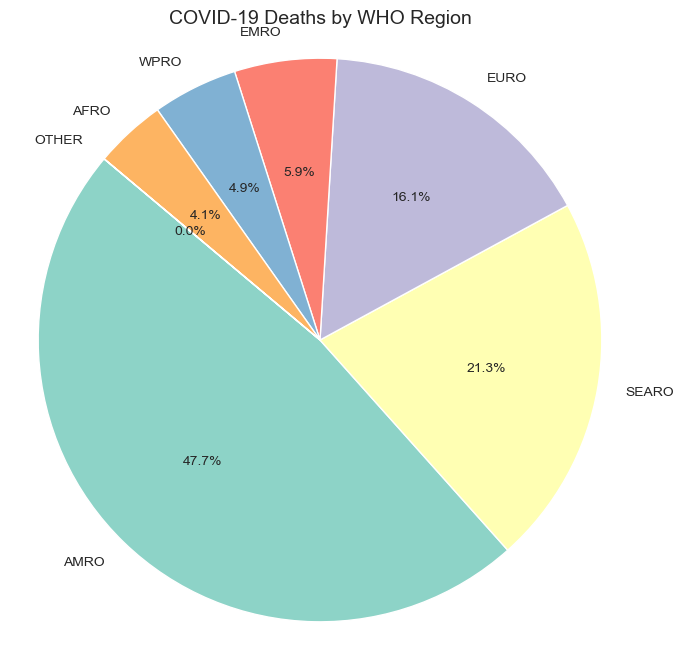

In [41]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(
    deaths_by_region.values,
    labels=deaths_by_region.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3')
)

plt.title('COVID-19 Deaths by WHO Region', fontsize=14)
plt.axis('equal')
plt.show()


# Advanced Insights & Grouped Analysis

Year-wise Total Cases & Deaths

In [42]:
yearly_stats = df.groupby('Year')[['New_cases', 'New_deaths']].sum()
yearly_stats

,New_cases,New_deaths
Year,,
2020,27530604.0,670853.0
2021,78733874.0,1367330.0
2022,131629920.0,435485.0
2023,48854857.0,196415.0
2024,837180.0,17853.0


Region-wise Total New Cases & Deaths

In [43]:
region_stats = df.groupby('WHO_region')[['New_cases', 'New_deaths']].sum().sort_values(by='New_cases', ascending=False)
region_stats


,New_cases,New_deaths
WHO_region,,
EURO,103645755.0,848475.0
WPRO,77786727.0,220173.0
AMRO,71145366.0,1111644.0
SEARO,22651986.0,305014.0
EMRO,8705559.0,135308.0
AFRO,3650951.0,67316.0
OTHER,91.0,6.0


Top 5 Countries by Year (Multi-level GroupBy)

In [44]:
# Group by Year and Country, then sum new cases
year_country_group = df.groupby(['Year', 'Country'])['New_cases'].sum().reset_index()

# Sort within each year
top5_each_year = year_country_group.sort_values(['Year', 'New_cases'], ascending=[True, False]).groupby('Year').head(5)
top5_each_year


,Year,Country,New_cases
229,2020,United States of America,6026022.0
96,2020,India,3723124.0
28,2020,Brazil,2661548.0
178,2020,Russian Federation,1006958.0
72,2020,France,974674.0
469,2021,United States of America,13336267.0
336,2021,India,10304081.0
268,2021,Brazil,5425357.0
466,2021,United Kingdom of Great Britain and Northern I...,3812298.0
462,2021,T�rkiye,2989919.0
